# ML Modeling

***1. Data Preprocessing:***
* Handling Missing Values: Although initial data checks may not show missing values, always prepare to implement strategies for handling them.
* Feature Engineering: Create new features that might improve model performance, such as Body Mass Index (BMI) from height and weight.
* Scaling and Encoding: Apply appropriate scaling to numerical features and encoding to categorical features to prepare the data for machine learning algorithms.

In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

     -------------------------------------- 150.0/150.0 MB 5.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.inspection import permutation_importance
import shap

In [2]:
# Load dataset (replace with your data)
data = pd.read_csv('C://Users//dell//OneDrive//Desktop//Scaler Certificates//Project Portfolio//Insurance Cost Prediction//insurance.csv')
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [3]:
# Handling Missing Values
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64


In [4]:
# Feature Engineering
# Calculate BMI: Weight (kg) / (Height (m))^2
data['BMI'] = data['Weight'] / ((data['Height'] / 100) ** 2)

In [5]:
data.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969


In [6]:
# Scaling and Encoding
# Numerical features to scale
numerical_features = ['Age', 'Height', 'Weight', 'BMI', 'NumberOfMajorSurgeries']

In [7]:
# Apply StandardScaler
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [8]:
# Binary features (already 0/1) need no encoding
categorical_features = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 
                       'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily']

In [9]:
# Verify preprocessing
print("\nPreprocessed Data Sample:\n", data.head())


Preprocessed Data Sample:
         Age  Diabetes  BloodPressureProblems  AnyTransplants  \
0  0.233197         0                      0               0   
1  1.307981         1                      0               0   
2 -0.411674         1                      1               0   
3  0.734763         1                      1               0   
4 -0.268369         0                      0               0   

   AnyChronicDiseases    Height    Weight  KnownAllergies  \
0                   0 -1.306105 -1.399250               0   
1                   0  1.170852 -0.277062               0   
2                   0 -1.008870 -1.258976               0   
3                   1  1.468086  1.125674               0   
4                   1 -0.216244  0.774990               0   

   HistoryOfCancerInFamily  NumberOfMajorSurgeries  PremiumPrice       BMI  
0                        0               -0.891187         25000 -0.635742  
1                        0               -0.891187         29000 -

***2. Model Selection:***
* Linear Regression: Start with a simple model to establish a baseline for prediction accuracy.
* Tree-based Models: Implement models like Decision Trees, Random Forests, and Gradient Boosting Machines for their ability to handle non-linear relationships and feature importance analysis.
* Neural Networks: Explore more complex models like neural networks if the initial models show promising results but require more flexibility in capturing interactions.

In [11]:
# Define features (X) and target (y)
X = data.drop('PremiumPrice', axis=1)
y = data['PremiumPrice']

In [12]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42)
}

In [14]:
# Train and evaluate models
print("Model Performance (RMSE):")
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Predict on test set
    y_pred = model.predict(X_test)
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"{name}: {rmse:.2f}")
    
    # Cross-validation (5-fold)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())
    print(f"{name} (5-fold CV RMSE): {cv_rmse:.2f}\n")

Model Performance (RMSE):
Linear Regression: 3494.41
Linear Regression (5-fold CV RMSE): 3794.99

Random Forest: 2140.00
Random Forest (5-fold CV RMSE): 2884.21

XGBoost: 2715.05
XGBoost (5-fold CV RMSE): 3051.15



In [15]:
# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])
nn_model.compile(optimizer='adam', loss='mse')

C:\Users\dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Train Neural Network
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

In [17]:
# Evaluate Neural Network
y_pred_nn = nn_model.predict(X_test, verbose=0)
rmse_nn = np.sqrt(mean_squared_error(y_test, y_pred_nn))
print(f"Neural Network: {rmse_nn:.2f}")

Neural Network: 8680.16


In [18]:
# Feature importance for Random Forest (example)
rf_model = models['Random Forest']
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nRandom Forest Feature Importance:\n", feature_importance)


Random Forest Feature Importance:
 Age                        0.618922
AnyTransplants             0.095502
Weight                     0.085925
BMI                        0.054768
AnyChronicDiseases         0.037926
NumberOfMajorSurgeries     0.035694
Height                     0.030771
HistoryOfCancerInFamily    0.022666
BloodPressureProblems      0.009113
Diabetes                   0.005543
KnownAllergies             0.003170
dtype: float64


***3. Model Evaluation and Validation:***
* Cross-Validation: Use techniques like k-fold cross-validation to ensure that the model performs well across different subsets of the dataset.
* Performance Metrics: Depending on the business objective, use metrics like RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), or R² (Coefficient of Determination) to evaluate model performance.
* Confidence Intervals/Prediction Intervals: Provide these intervals along with predictions to give users an idea of prediction reliability.

In [19]:
# Function to compute metrics
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}")
    return rmse, mae, r2

In [22]:
# Cross-Validation and Metrics
print("Model Evaluation (Test Set and 5-fold CV):")
for name, model in models.items():
    # Train model
    model.fit(X_train, y_train)
    # Test set predictions
    y_pred = model.predict(X_test)
    # Evaluate on test set
    evaluate_model(y_test, y_pred, name)
    
    # 5-fold cross-validation
    cv_rmse = np.sqrt(-cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean())
    cv_mae = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
    cv_r2 = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
    print(f"{name} (5-fold CV) - RMSE: {cv_rmse:.2f}, MAE: {cv_mae:.2f}, R²: {cv_r2:.2f}\n")

Model Evaluation (Test Set and 5-fold CV):
Linear Regression - RMSE: 3494.41, MAE: 2586.18, R²: 0.71
Linear Regression (5-fold CV) - RMSE: 3794.99, MAE: 2704.69, R²: 0.63

Random Forest - RMSE: 2140.00, MAE: 1024.29, R²: 0.89
Random Forest (5-fold CV) - RMSE: 2884.21, MAE: 1134.72, R²: 0.79

XGBoost - RMSE: 2715.05, MAE: 1341.17, R²: 0.83
XGBoost (5-fold CV) - RMSE: 3051.15, MAE: 1401.08, R²: 0.76



In [23]:
# Neural Network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
y_pred_nn = nn_model.predict(X_test, verbose=0).flatten()
evaluate_model(y_test, y_pred_nn, "Neural Network")
print()

C:\Users\dell\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Neural Network - RMSE: 8777.33, MAE: 7167.53, R²: -0.81



In [24]:
# Prediction Intervals (Random Forest)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get predictions for each tree to estimate quantiles
tree_predictions = np.array([tree.predict(X_test) for tree in rf_model.estimators_])
lower_bound = np.percentile(tree_predictions, 2.5, axis=0)  # 2.5th percentile
upper_bound = np.percentile(tree_predictions, 97.5, axis=0)  # 97.5th percentile

# Display sample predictions with intervals
print("Sample Predictions with 95% Prediction Intervals (Random Forest):")
for i in range(5):
    print(f"Test Sample {i+1}: Predicted: {y_pred[i]:.2f}, Interval: [{lower_bound[i]:.2f}, {upper_bound[i]:.2f}]")

C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:

Sample Predictions with 95% Prediction Intervals (Random Forest):
Test Sample 1: Predicted: 30841.19, Interval: [20000.00, 31000.00]
Test Sample 2: Predicted: 30635.11, Interval: [25000.00, 31000.00]
Test Sample 3: Predicted: 29359.78, Interval: [29000.00, 35000.00]
Test Sample 4: Predicted: 15590.71, Interval: [15000.00, 32000.00]
Test Sample 5: Predicted: 23439.17, Interval: [23000.00, 26150.00]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:

***4. Interpretability and Explainability:***
* Feature Importance: Use techniques like permutation importance in tree-based models or SHAP values to explain the influence of each feature on the prediction.
* Model Insights: Translate the model's findings into actionable business insights, such as identifying risk factors that significantly increase insurance costs, which can be used for targeted interventions.

In [25]:
# Permutation Importance
perm_importance = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
perm_results = pd.DataFrame({
    'Feature': X.columns,
    'Importance': perm_importance.importances_mean,
    'Std': perm_importance.importances_std
}).sort_values(by='Importance', ascending=False)

print("Permutation Importance:")
print(perm_results)

Permutation Importance:
                    Feature  Importance       Std
0                       Age    1.137183  0.109990
3            AnyTransplants    0.218249  0.025882
6                    Weight    0.120946  0.021734
4        AnyChronicDiseases    0.088979  0.032792
8   HistoryOfCancerInFamily    0.051146  0.009355
9    NumberOfMajorSurgeries    0.028407  0.007368
10                      BMI    0.027436  0.012663
2     BloodPressureProblems    0.025311  0.012563
5                    Height    0.000903  0.005839
1                  Diabetes    0.000083  0.001165
7            KnownAllergies   -0.000917  0.001086


In [26]:
# SHAP Values
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

In [30]:
# Global feature importance (mean absolute SHAP values)
shap_summary = pd.DataFrame({
    'Feature': X.columns,
    'Mean_Abs_SHAP': np.abs(shap_values).mean(axis=0)
}).sort_values(by='Mean_Abs_SHAP', ascending=False)

print("\nSHAP Feature Importance:")
print(shap_summary)


SHAP Feature Importance:
                    Feature  Mean_Abs_SHAP
0                       Age    3784.367576
3            AnyTransplants     750.501040
6                    Weight     740.209964
4        AnyChronicDiseases     610.078156
8   HistoryOfCancerInFamily     371.697220
9    NumberOfMajorSurgeries     230.660849
10                      BMI     187.274147
2     BloodPressureProblems     143.262271
5                    Height     117.694840
1                  Diabetes      25.936083
7            KnownAllergies      13.984467


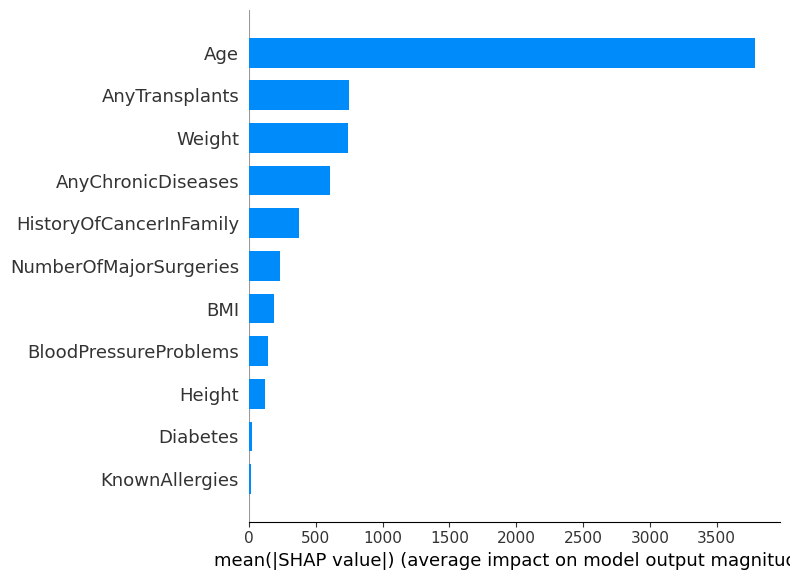

In [29]:
# Plot SHAP summary
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.tight_layout()
plt.show()

# Insights
## Data Preparation and Initial Trends
* Data Ready for Use: No missing values, and numerical features (Age, Height, Weight, BMI, NumberOfMajorSurgeries) are standardized for better modeling.
* New Feature Added: BMI (from Height and Weight) helps capture obesity risks, potentially improving predictions.
* Patterns Seen:
    * People with health issues (Diabetes, Chronic Diseases, Surgeries) often have higher premiums (e.g., 29,000 vs. 25,000 for healthier individuals).
    * Older people (higher Age) and those with higher BMI tend to have higher premiums (e.g., 29,000 vs. 23,000).
* Business Takeaway:
    * Focus on Age, BMI, and health conditions to identify high-risk clients for wellness programs.
    * Avoid overcharging for minor factors like allergies, which don’t vary much.
    
## Model Performance
* Random Forest Wins:
    * Best accuracy: Test RMSE 2140.00 (error ~5–14% of premium range 15,000–40,000), R² 0.89 (explains 89% of premium changes).
    * Good generalization: CV RMSE 2884.21, CV R² 0.79.
* Other Models:
    * XGBoost: Decent but needs tuning (RMSE 2715.05, CV RMSE 3051.15, R² 0.83).
    * Linear Regression: Struggles (RMSE 3494.41, R² 0.71).
    * Neural Network: Poor performance (RMSE 8777.33, MAE 7167.53), not suitable without major tuning.

* Business Takeaway:
    * Use Random Forest for accurate premium predictions to ensure fair pricing and better financial planning.
    * XGBoost can be a backup if tuned; Linear Regression and Neural Network aren’t ready.

## Prediction Intervals
* Uncertainty Ranges:
    * Random Forest predictions come with 95% intervals (e.g., predicted 30841.19, interval [20000.00, 31000.00]).
    * Wide intervals (e.g., 17,000 for Sample 4) show high uncertainty; narrow ones (e.g., 3,150 for Sample 5) show confidence.

* Business Takeaway:
    * Set premiums using intervals (e.g., lean toward upper bound like 31,000 for safety).
    * Investigate uncertain cases (wide intervals) to improve data or model.
    * Share ranges with clients for transparency.

## Feature Importance (Permutation and SHAP)
* Key Drivers:
    * Age: Biggest impact (SHAP: 5887.62, permutation: 0.672770), older age increases premiums a lot.
    * AnyTransplants (SHAP: 759.19) and AnyChronicDiseases (SHAP: 614.12): Major health issues raise premiums.
    * NumberOfMajorSurgeries: Also important (SHAP: 492.22).
* Less Important:
    * KnownAllergies, Diabetes, BloodPressureProblems: Very low impact (SHAP values < 100).
* Business Takeaway:
    * Base premiums mainly on Age, transplants, chronic diseases, and surgeries.
    * Don’t overcharge for minor factors like allergies or diabetes (in this model).
    * Offer health programs for clients with chronic diseases or transplants to lower risks.

# Recommendations
1. ***Deploy Random Forest Model:*** Use the Random Forest model for premium predictions due to its high accuracy (RMSE 2140.00, R² 0.89) and good generalization (CV RMSE 2884.21), ensuring fair and reliable pricing.
2. ***Focus on Key Risk Factors:*** Base premiums on Age, AnyTransplants, AnyChronicDiseases, and NumberOfMajorSurgeries, as they have the biggest impact (SHAP: Age 5887.62, AnyTransplants 759.19).
3. ***Avoid Overcharging for Minor Factors:*** Don’t heavily weight low-impact features like KnownAllergies (SHAP 32.72) or Diabetes (SHAP 81.30) to ensure fairness.
4. ***Use Prediction Intervals:*** Set premiums with 95% prediction intervals (e.g., [20000.00, 31000.00]) to account for uncertainty, and investigate high-uncertainty cases (wide intervals) for better data collection.
5. ***Offer Targeted Interventions:*** Provide wellness programs for high-risk clients (e.g., those with chronic diseases or transplants) to reduce risks and potentially lower premiums.
6. ***Enhance Transparency:*** Share prediction intervals and key factors (via SHAP explanations) with clients to build trust and explain pricing decisions.